In [2]:
# Midterm Project by One Team One Goal

# 2 Set Up the Environment
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns  

In [3]:
# 3 Data Exploration

#    [] Load the dataset
data = pd.read_csv('otog_data.csv')

#     [] Clean the data
data_cleaned = data.drop(columns=['CID', 'TID'])
data_cleaned.fillna(0, inplace=True)
data_cleaned['Discount Amount (INR)'] = data_cleaned['Discount Amount (INR)'].astype(float)
data_cleaned.drop_duplicates(inplace=True)


In [8]:
grouped_data = data.groupby(['Gender', 'Product Category']).size().reset_index(name='counts')

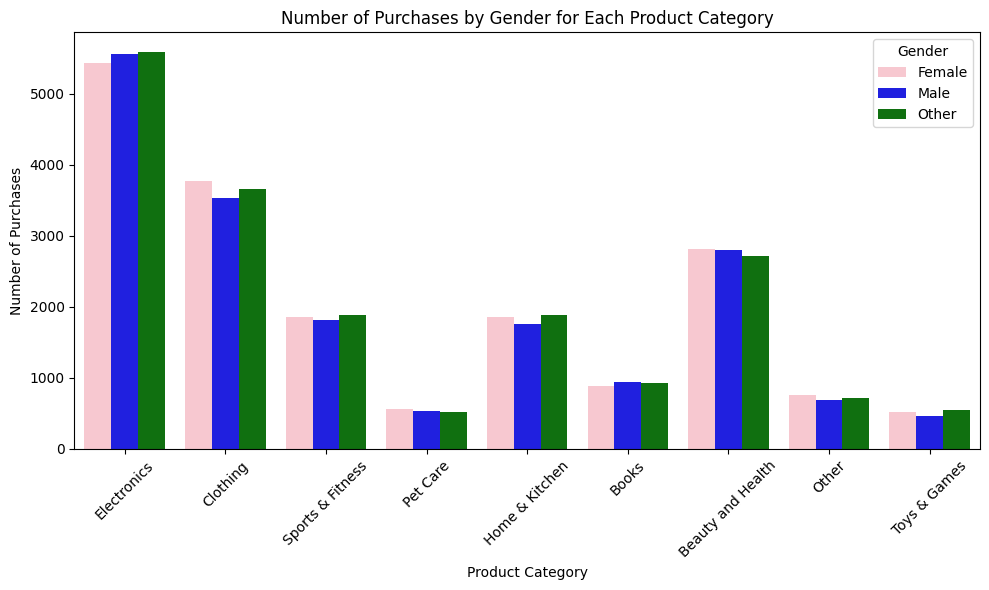

In [10]:
custom_palette = {'Female': 'pink', 'Male': 'blue', 'Other': 'green'}

# Visualize using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', hue='Gender', data=data, palette=custom_palette, hue_order=['Female', 'Male', 'Other'])
plt.title('Number of Purchases by Gender for Each Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
grouped_data = data.groupby(['Age Group', 'Product Category']).size().reset_index(name='counts')

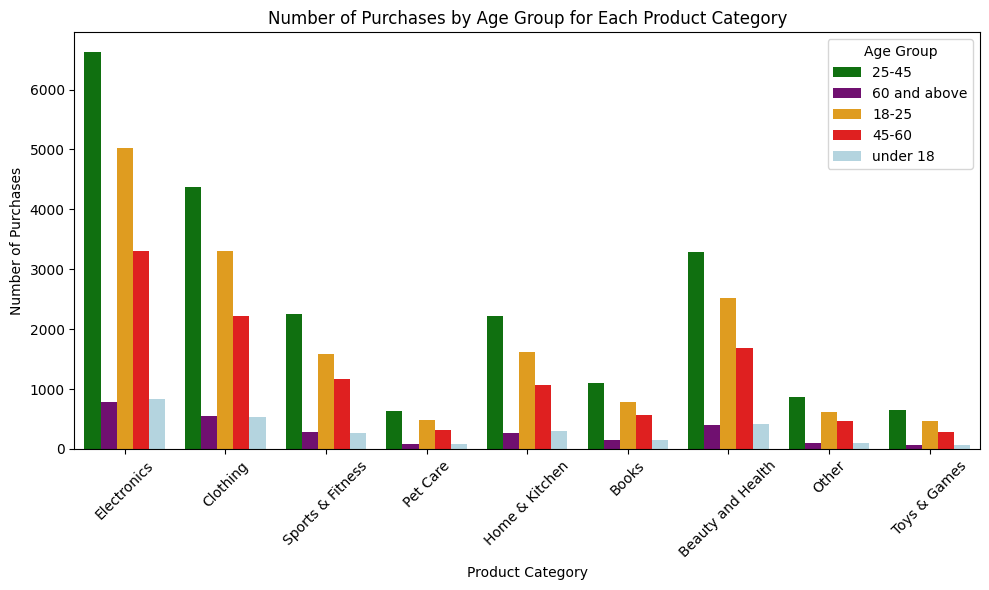

In [13]:
custom_palette = {
    'under 18': 'lightblue', 
    '18-25': 'orange', 
    '25-45': 'green', 
    '45-60': 'red', 
    '60 and above': 'purple'
}

# Visualize using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', hue='Age Group', data=data, palette=custom_palette)
plt.title('Number of Purchases by Age Group for Each Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], format='%d/%m/%Y %H:%M:%S')
sales_by_month = data.groupby(data['Purchase Date'].dt.month)['Gross Amount'].sum().reset_index()


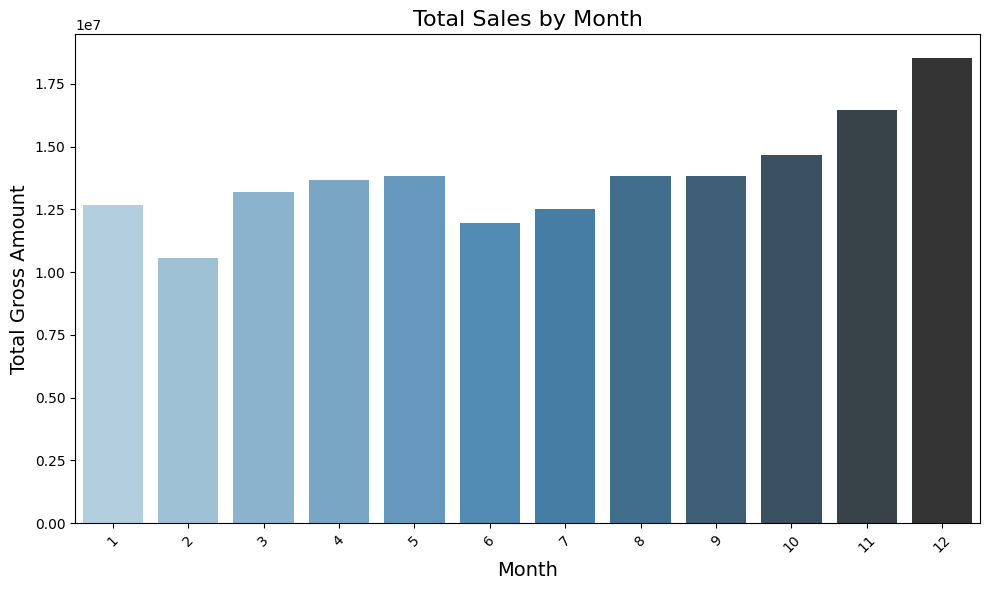

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_month['Purchase Date'], y=sales_by_month['Gross Amount'], hue=sales_by_month['Purchase Date'], palette='Blues_d', legend=False)

plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Gross Amount', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# Understand how purchases vary over time by analyzing the "Purchase Date" field